In [66]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# Load the scraped stock data into a pandas DataFrame
df = pd.read_csv('dataset/Amazon_data.csv')

# Check for missing values
print(df.isnull().sum())  # Count the number of missing values in each column
df.head()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


,date,open,high,low,close,volume
0,2010-01-04,136.25,136.610,133.14,133.90,7599900.0
1,2010-01-05,133.43,135.479,131.81,134.69,8851900.0
2,2010-01-06,134.60,134.730,131.65,132.25,7178800.0
3,2010-01-07,132.01,132.320,128.80,130.00,11030200.0
4,2010-01-08,130.56,133.680,129.03,133.52,9830500.0


In [68]:
df["date"]=pd.to_datetime(df.date)
df.set_index('date', inplace=True)

In [69]:
#resampling data by Month
resampled_df=df.resample('ME').mean()
#resampling data by Year
resampled_df_d=df.resample('YE').mean()

In [70]:
resampled_df

,open,high,low,close,volume
date,,,,,
2010-01-31,128.355900,129.780995,125.657421,127.423053,1.215058e+07
2010-02-28,118.192558,119.553163,116.074737,118.021053,1.106031e+07
2010-03-31,130.322830,132.098435,128.931739,130.897348,6.871417e+06
2010-04-30,140.897143,143.182143,138.889614,141.070048,8.239290e+06
2010-05-31,127.790375,130.340500,124.952000,127.606150,7.045495e+06
...,...,...,...,...,...
2022-08-31,137.867696,139.706983,135.904100,137.439565,5.088650e+07
2022-09-30,123.163048,125.135062,121.258810,123.213810,5.761846e+07
2022-10-31,114.124619,116.545433,112.096905,114.460476,6.950055e+07


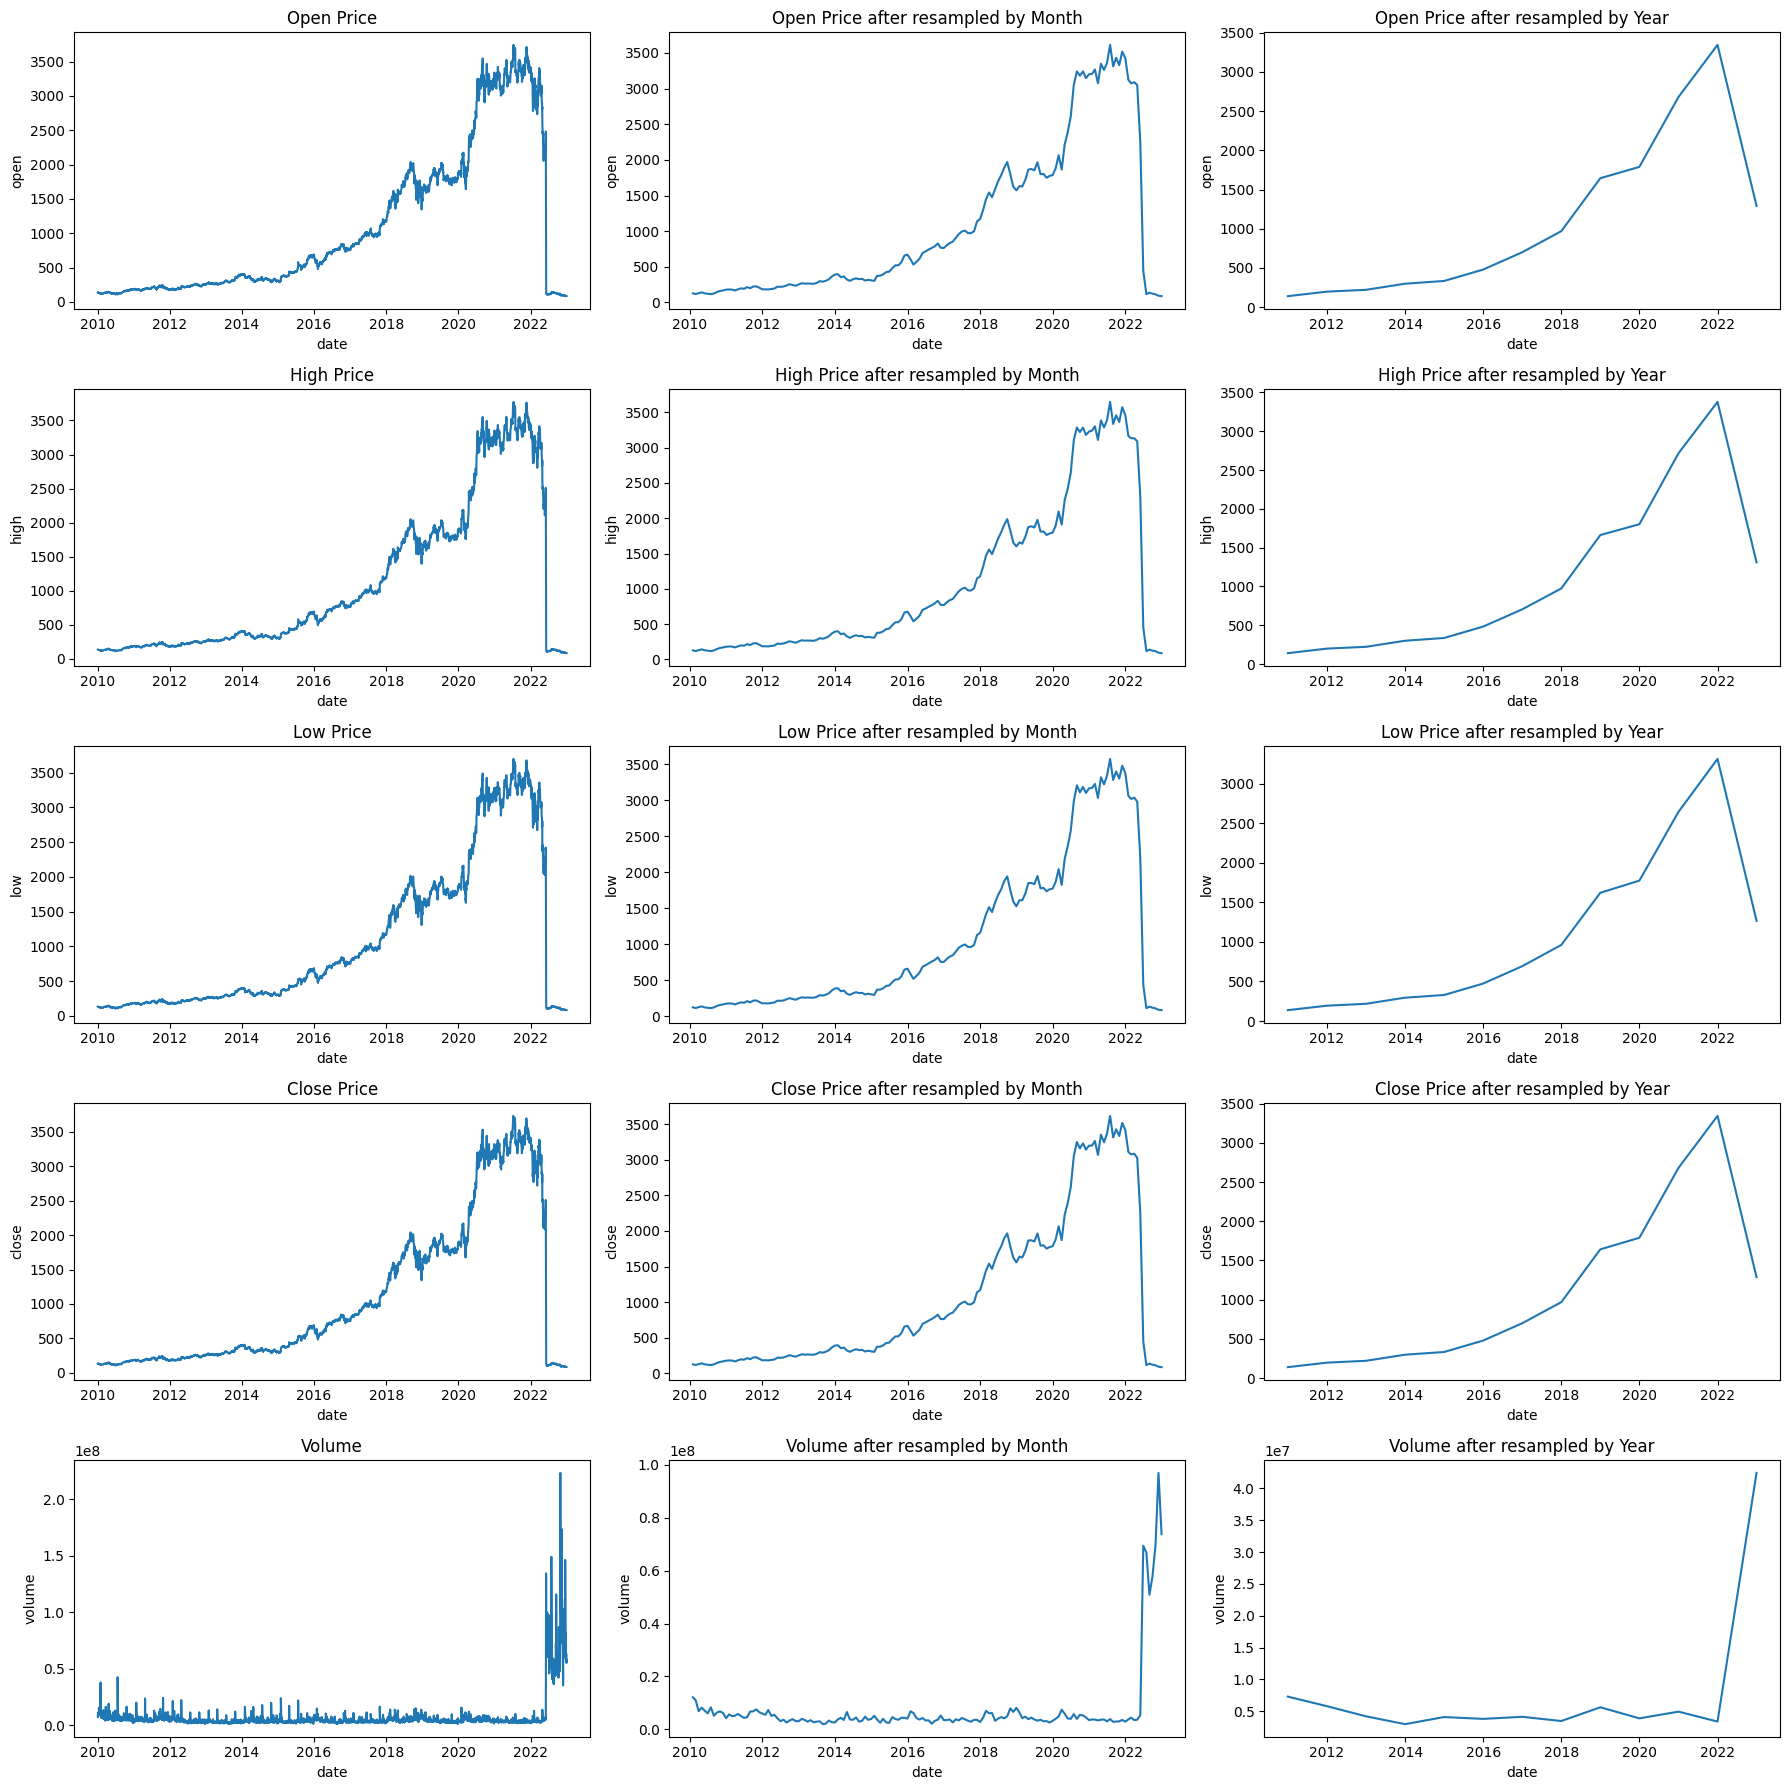

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=5, ncols=3,figsize=(18,18))
sns.lineplot(ax=axes[0,0], x=df.index,y=df.open).set_title("Open Price")
sns.lineplot(ax=axes[0,1], x=resampled_df.index,y=resampled_df.open).set_title("Open Price after resampled by Month")
sns.lineplot(ax=axes[0,2], x=resampled_df_d.index,y=resampled_df_d.open).set_title("Open Price after resampled by Year")

sns.lineplot(ax=axes[1,0], x=df.index,y=df.high).set_title("High Price")
sns.lineplot(ax=axes[1,1], x=resampled_df.index,y=resampled_df.high).set_title("High Price after resampled by Month")
sns.lineplot(ax=axes[1,2], x=resampled_df_d.index,y=resampled_df_d.high).set_title("High Price after resampled by Year")

sns.lineplot(ax=axes[2,0], x=df.index,y=df.low).set_title("Low Price")
sns.lineplot(ax=axes[2,1], x=resampled_df.index,y=resampled_df.low).set_title("Low Price after resampled by Month")
sns.lineplot(ax=axes[2,2], x=resampled_df_d.index,y=resampled_df_d.low).set_title("Low Price after resampled by Year")

sns.lineplot(ax=axes[3,0], x=df.index,y=df.close).set_title("Close Price")
sns.lineplot(ax=axes[3,1], x=resampled_df.index,y=resampled_df.close).set_title("Close Price after resampled by Month")
sns.lineplot(ax=axes[3,2], x=resampled_df_d.index,y=resampled_df_d.close).set_title("Close Price after resampled by Year")

sns.lineplot(ax=axes[4,0], x=df.index,y=df.volume).set_title("Volume")
sns.lineplot(ax=axes[4,1], x=resampled_df.index,y=resampled_df.volume).set_title("Volume after resampled by Month")
sns.lineplot(ax=axes[4,2], x=resampled_df_d.index,y=resampled_df_d.volume).set_title("Volume after resampled by Year")

plt.tight_layout()
plt.show()


## From above graph we can say stock price doesn't have any trend or seasonality

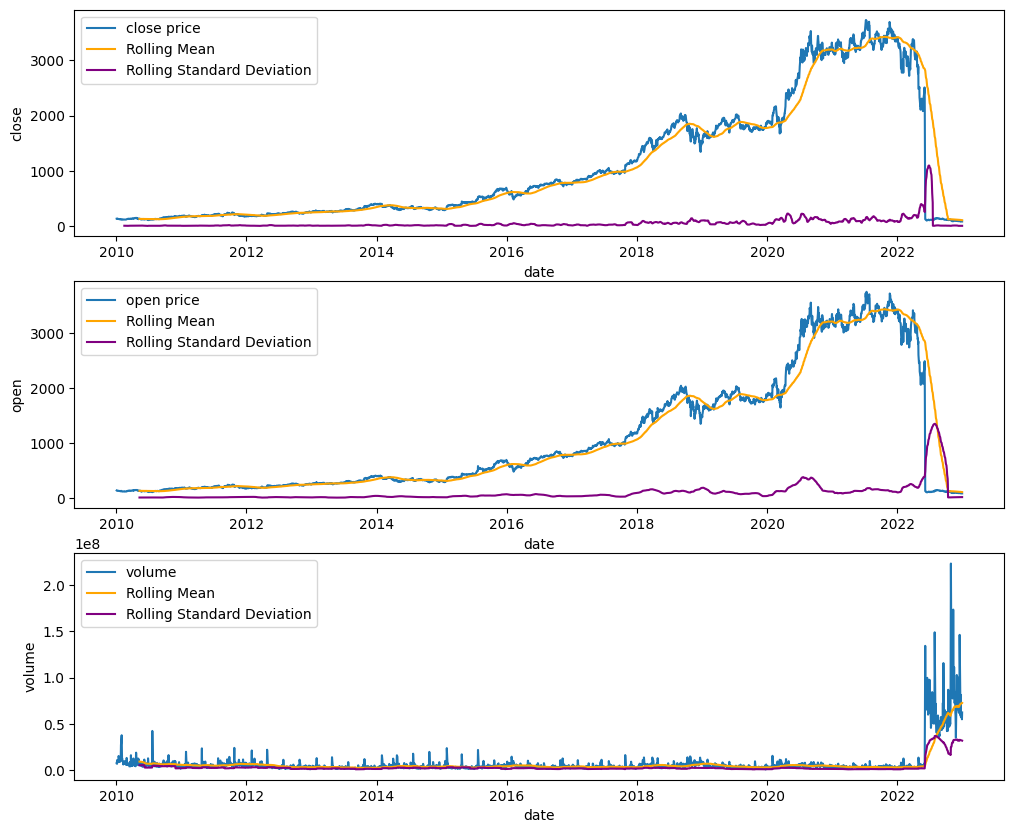

In [72]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,10))


sns.lineplot(x=df.index,y=df["close"], ax=axes[0], label='close price')
sns.lineplot(x=df.index,y=df['close'].rolling(90).mean(), ax=axes[0], label='Rolling Mean', color='orange')
sns.lineplot(x=df.index,y=df['close'].rolling(30).std(), ax=axes[0], label='Rolling Standard Deviation', color='purple')
axes[0].legend()


sns.lineplot(x=df.index,y=df["open"], ax=axes[1], label='open price')
sns.lineplot(x=df.index,y=df['open'].rolling(90).mean(), ax=axes[1], label='Rolling Mean', color='orange')
sns.lineplot(x=df.index,y=df['open'].rolling(90).std(), ax=axes[1], label='Rolling Standard Deviation', color='purple')
axes[1].legend()

sns.lineplot(x=df.index,y=df["volume"], ax=axes[2], label='volume')
sns.lineplot(x=df.index,y=df['volume'].rolling(90).mean(), ax=axes[2], label='Rolling Mean', color='orange')
sns.lineplot(x=df.index,y=df['volume'].rolling(90).std(), ax=axes[2], label='Rolling Standard Deviation', color='purple')
axes[2].legend()

plt.show()

## From the above picture we can say data is non-stationary

In [73]:
df

,open,high,low,close,volume
date,,,,,
2010-01-04,136.25,136.610,133.1400,133.90,7599900.0
2010-01-05,133.43,135.479,131.8100,134.69,8851900.0
2010-01-06,134.60,134.730,131.6500,132.25,7178800.0
2010-01-07,132.01,132.320,128.8000,130.00,11030200.0
2010-01-08,130.56,133.680,129.0300,133.52,9830500.0
...,...,...,...,...,...
2022-12-23,83.25,85.780,82.9344,85.25,57433655.0
2022-12-27,84.97,85.350,83.0000,83.04,57284035.0
2022-12-28,82.80,83.480,81.6900,81.82,58228575.0


In [74]:
df['update_open'] = df['open'].shift(1)
df['update_high'] = df['high'].shift(1)
df['update_low'] = df['low'].shift(1)
df['update_close'] = df['close'].shift(1)
df['update_volume'] = df['volume'].shift(1)
print(df)

              open     high       low   close      volume  update_open  \
date                                                                     
2010-01-04  136.25  136.610  133.1400  133.90   7599900.0          NaN   
2010-01-05  133.43  135.479  131.8100  134.69   8851900.0       136.25   
2010-01-06  134.60  134.730  131.6500  132.25   7178800.0       133.43   
2010-01-07  132.01  132.320  128.8000  130.00  11030200.0       134.60   
2010-01-08  130.56  133.680  129.0300  133.52   9830500.0       132.01   
...            ...      ...       ...     ...         ...          ...   
2022-12-23   83.25   85.780   82.9344   85.25  57433655.0        85.52   
2022-12-27   84.97   85.350   83.0000   83.04  57284035.0        83.25   
2022-12-28   82.80   83.480   81.6900   81.82  58228575.0        84.97   
2022-12-29   82.87   84.550   82.5500   84.18  54995895.0        82.80   
2022-12-30   83.12   84.050   82.4700   84.00  62401194.0        82.87   

            update_high  update_low  

In [75]:
df.head()

,open,high,low,close,volume,update_open,update_high,update_low,update_close,update_volume
date,,,,,,,,,,
2010-01-04,136.25,136.610,133.14,133.90,7599900.0,NaN,NaN,NaN,NaN,NaN
2010-01-05,133.43,135.479,131.81,134.69,8851900.0,136.25,136.610,133.14,133.90,7599900.0
2010-01-06,134.60,134.730,131.65,132.25,7178800.0,133.43,135.479,131.81,134.69,8851900.0
2010-01-07,132.01,132.320,128.80,130.00,11030200.0,134.60,134.730,131.65,132.25,7178800.0
2010-01-08,130.56,133.680,129.03,133.52,9830500.0,132.01,132.320,128.80,130.00,11030200.0


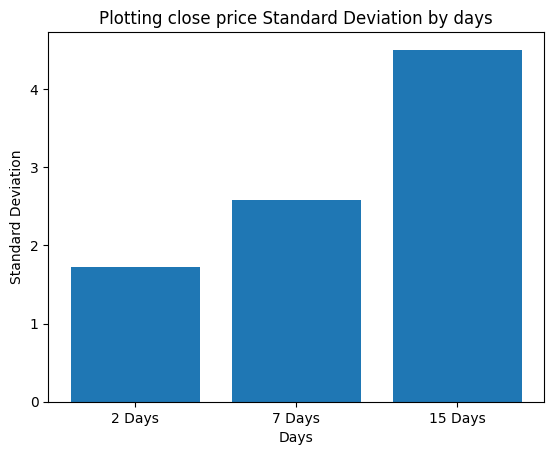

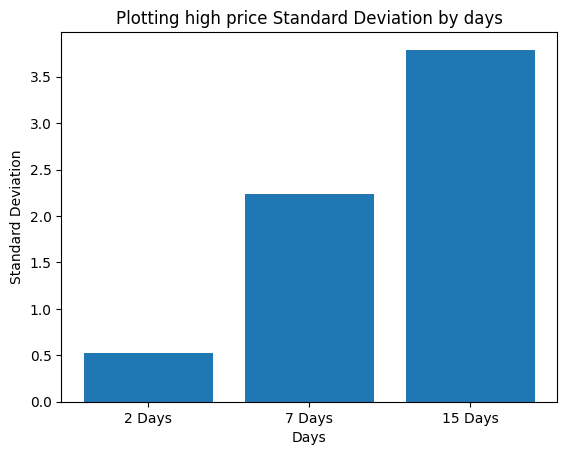

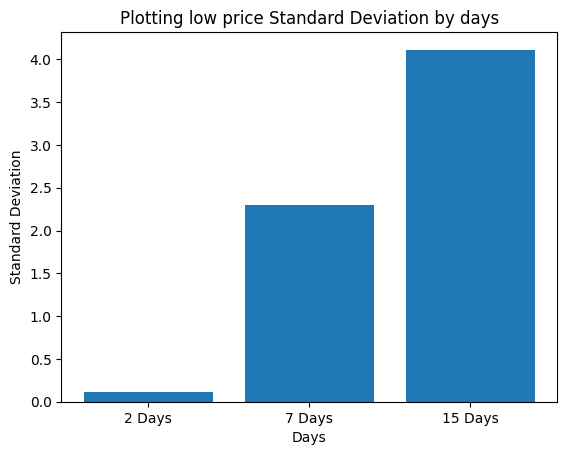

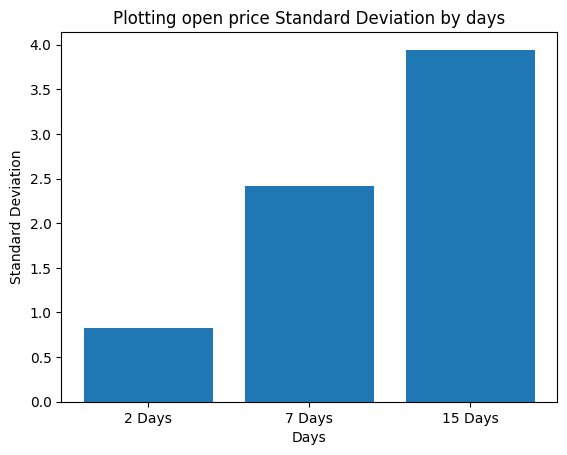

In [76]:
def ploting(v1,v2,v3,X):

    days=[]
    while(1):
        days.append(df[X].iloc[1:(v1+1)].std())
        days.append(df[X].iloc[1:(v2+1)].std())
        days.append(df[X].iloc[1:(v3+1)].std())
        break

    labels = [str(v1)+' Days', str(v2)+' Days', str(v3)+' Days']
    
    # Plotting the values as a bar chart
    plt.bar(labels, days)
    
    # Adding labels and title
    plt.xlabel('Days')
    plt.ylabel('Standard Deviation')
    plt.title('Plotting '+X+' price Standard Deviation by days')
    
    # Displaying the plot
    plt.show()

ploting(2,7,15,'close')
ploting(2,7,15,'high')
ploting(2,7,15,'low')
ploting(2,7,15,'open')

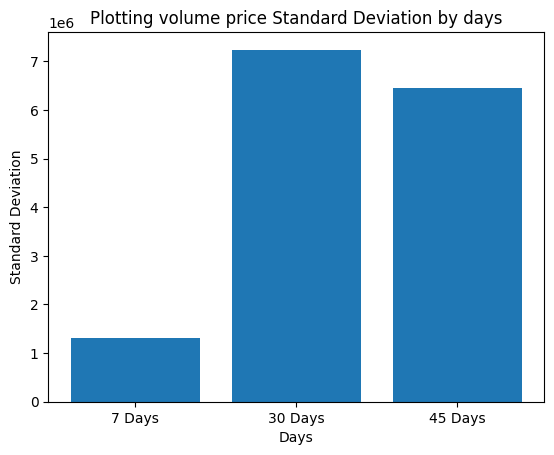

In [77]:
ploting(7,30,45,'volume')

In [78]:
df.update_close.fillna(df.close.iloc[1:3].mean(), inplace=True)
df.update_high.fillna(df.high.iloc[1:3].mean(), inplace=True)
df.update_low.fillna(df.low.iloc[1:3].mean(), inplace=True)
df.update_open.fillna(df.open.iloc[1:3].mean(), inplace=True)
df.update_volume.fillna(df.volume.iloc[1:8].mean(), inplace=True)

/var/folders/5r/8jpxvt3s2m1cz_nm5k_xb8tm0000gn/T/ipykernel_17369/109213357.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.update_close.fillna(df.close.iloc[1:3].mean(), inplace=True)
/var/folders/5r/8jpxvt3s2m1cz_nm5k_xb8tm0000gn/T/ipykernel_17369/109213357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [79]:
df

,open,high,low,close,volume,update_open,update_high,update_low,update_close,update_volume
date,,,,,,,,,,
2010-01-04,136.25,136.610,133.1400,133.90,7599900.0,134.015,135.1045,131.7300,133.47,9.355757e+06
2010-01-05,133.43,135.479,131.8100,134.69,8851900.0,136.250,136.6100,133.1400,133.90,7.599900e+06
2010-01-06,134.60,134.730,131.6500,132.25,7178800.0,133.430,135.4790,131.8100,134.69,8.851900e+06
2010-01-07,132.01,132.320,128.8000,130.00,11030200.0,134.600,134.7300,131.6500,132.25,7.178800e+06
2010-01-08,130.56,133.680,129.0300,133.52,9830500.0,132.010,132.3200,128.8000,130.00,1.103020e+07
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,83.25,85.780,82.9344,85.25,57433655.0,85.520,85.6800,82.2500,83.79,8.143131e+07
2022-12-27,84.97,85.350,83.0000,83.04,57284035.0,83.250,85.7800,82.9344,85.25,5.743366e+07
2022-12-28,82.80,83.480,81.6900,81.82,58228575.0,84.970,85.3500,83.0000,83.04,5.728404e+07


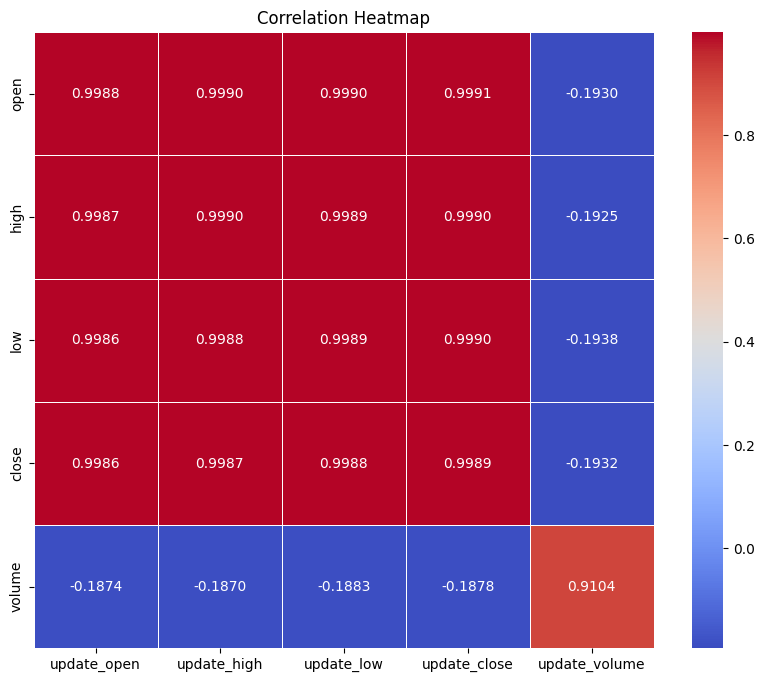

In [80]:
main_columns = ['open', 'high','low','close','volume']
updated_columns = ['update_open', 'update_high','update_low','update_close','update_volume']
subset_df = df[main_columns + updated_columns]
correlation_matrix = subset_df.corr()
correlation_matrix = correlation_matrix.loc[['open', 'high','low','close','volume'], ['update_open', 'update_high','update_low','update_close','update_volume']]
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f',linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [81]:
df.drop(["open","high","low","volume"],axis=1,inplace=True)

In [82]:
start_date="2010-01-04"
end_date="2020-12-31"
val_start_date="2021-01-04"
val_end_date="2021-12-31"
test_start_date="2022-01-03"
test_end_date="2022-12-30"

train_data=df[start_date:end_date]
val_data=df[val_start_date:val_end_date]
test_data=df[test_start_date:test_end_date]

In [83]:
train_data

,close,update_open,update_high,update_low,update_close,update_volume
date,,,,,,
2010-01-04,133.90,134.015,135.1045,131.730,133.47,9.355757e+06
2010-01-05,134.69,136.250,136.6100,133.140,133.90,7.599900e+06
2010-01-06,132.25,133.430,135.4790,131.810,134.69,8.851900e+06
2010-01-07,130.00,134.600,134.7300,131.650,132.25,7.178800e+06
2010-01-08,133.52,132.010,132.3200,128.800,130.00,1.103020e+07
...,...,...,...,...,...,...
2020-12-24,3172.69,3205.000,3210.1300,3184.170,3185.27,2.093787e+06
2020-12-28,3283.96,3193.900,3202.0000,3169.000,3172.69,1.451917e+06
2020-12-29,3322.00,3194.000,3304.0000,3172.690,3283.96,5.620728e+06


In [84]:
# Normalisation
sc = MinMaxScaler()
train_d = sc.fit_transform(train_data)
val_d = sc.fit_transform(val_data)
test_d=sc.fit_transform(test_data)
print(train_d.shape,val_d.shape,test_d.shape)

(2769, 6) (252, 6) (251, 6)


In [85]:
print(train_d)

[[0.0073886  0.00816315 0.00692089 0.00766959 0.00726297 0.20400743]
 [0.0076194  0.00881265 0.00735841 0.00808664 0.0073886  0.16173812]
 [0.00690655 0.00799314 0.00702972 0.00769325 0.0076194  0.19187791]
 ...
 [0.93880812 0.89741578 0.92785444 0.90712639 0.92769455 0.11409288]
 [0.92824672 0.93110874 0.9414117  0.93922834 0.93880812 0.09609097]
 [0.91979759 0.94013499 0.93892693 0.93959718 0.92824672 0.05604204]]


In [86]:
X, y = train_d[:, 1:], train_d[:, 0]
X_val,y_val=val_d[:, 1:], val_d[:, 0]

In [87]:
print(X.shape,y.shape,X_val.shape,y_val.shape)

(2769, 5) (2769,) (252, 5) (252,)


In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score
import pandas as pd

model = RandomForestRegressor(max_depth=20, max_features= 'sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42) #Seed -> help us to reproduce the model


# Train the model on the training data
model.fit(X, y)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200, random_state=42)

In [92]:
X_test,y_test=test_d[:, 1:], test_d[:, 0]
print(X_test.shape,y_test.shape)

(251, 5) (251,)


In [93]:
# Make predictions on the testing data
predict_value = []
predict_value.append(model.predict(X_test))

predict_value=np.array(predict_value)

predict_value=predict_value.reshape(predict_value.shape[1],predict_value.shape[0])
print(y_test.shape,predict_value.shape)

(251,) (251, 1)


In [94]:
# Make predictions on the validation data
preds = []
preds.append(model.predict(X_val))

preds=np.array(preds)

preds=preds.reshape(preds.shape[1],preds.shape[0])
print(y_val.shape,preds.shape)

(252,) (252, 1)


In [ ]:
predict_value=[]
for i in range(0,len(X_test)):
    a=X_test[i]
    a=a.reshape(1,X_test.shape[1])
    predict_value.append(model.predict(a))
    try:
        X_test[:,3][i+1]=predict_value[i][0]
    except:
        pass

predict_value=np.array(predict_value)

prdict_value=predict_value.reshape(predict_value.shape[1],predict_value.shape[0])

In [95]:
print(X_test[:,3][:5],predict_value[:5])

[0.97782802 1.         0.98266827 0.96363795 0.9570059 ] [[0.97387695]
 [0.97385873]
 [0.97407401]
 [0.96787711]
 [0.96475038]]


In [48]:
print(y_test.shape,predict_value.shape,y_val.shape,preds.shape)

(251,) (251, 1) (252,) (252, 1)


In [49]:
inv_yhat = np.concatenate((predict_value, test_d[:, 1:]), axis=1)
inv_yhat = sc.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [50]:
inv_yhat_val = np.concatenate((preds, val_d[:, 1:]), axis=1)
inv_yhat_val = sc.inverse_transform(inv_yhat_val)
inv_yhat_val = inv_yhat_val[:,0]

In [51]:
inv_train = sc.inverse_transform(train_d)
inv_valid = sc.inverse_transform(val_d)
inv_test = sc.inverse_transform(test_d)
inv_ytrain = inv_train[:,0]
inv_yvalid = inv_valid[:,0]
inv_ytest = inv_test[:,0]

print(inv_ytrain.shape,inv_yvalid.shape,inv_ytest.shape)

(2769,) (252,) (251,)


In [52]:
import pandas as pd

# Assuming `train_d`, `val_d`, and `test_d` are your arrays after inverse transformation,
# and `train`, `val`, and `test` are your original DataFrames with the index preserved

inv_train_df = pd.DataFrame(inv_train, index=train_data.index)
inv_valid_df = pd.DataFrame(inv_valid, index=val_data.index)
inv_test_df = pd.DataFrame(inv_test, index=test_data.index)

In [63]:
# Plot the data
train = train_data["close"]
train=pd.DataFrame(train, index=train_data.index)

valid = val_data["close"]
valid=valid.to_frame()
valid["val_predictions"]=inv_yhat_val
valid=pd.DataFrame(valid, index=val_data.index)

test = pd.DataFrame()
test=pd.DataFrame(test, index=test_data.index)
test["close"]=inv_ytest
test["test_predictions"]=inv_yhat

In [65]:
rmse_val = sqrt(mean_squared_error(valid["close"],valid["val_predictions"]))
mae_val = mean_absolute_error(valid["close"],valid["val_predictions"])
print("Score for Validation Dataset")
print('RMSE: %.3f' % rmse_val)
print('RMAE: %.3f' % mae_val)

Score for Validation Dataset
RMSE: 1685.470
RMAE: 1599.305


In [61]:
rmse_test = sqrt(mean_squared_error(test["close"],test["test_predictions"]))
mae_test = mean_absolute_error(test["close"],test["test_predictions"])
print("Score for Test Dataset")
print('RMSE: %.3f' % rmse_test)
print('RMAE: %.3f' % mae_test)

Score for Test Dataset
RMSE: 174.776
RMAE: 55.056


RMAE: 55.056


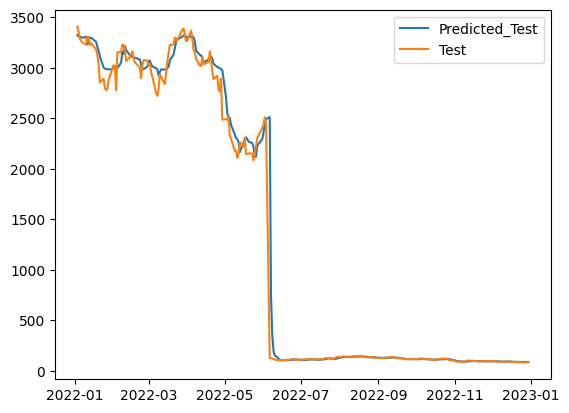

In [56]:
plt.plot(test["test_predictions"])
plt.plot(test["close"])
plt.legend(["Predicted_Test","Test"])
plt.show()

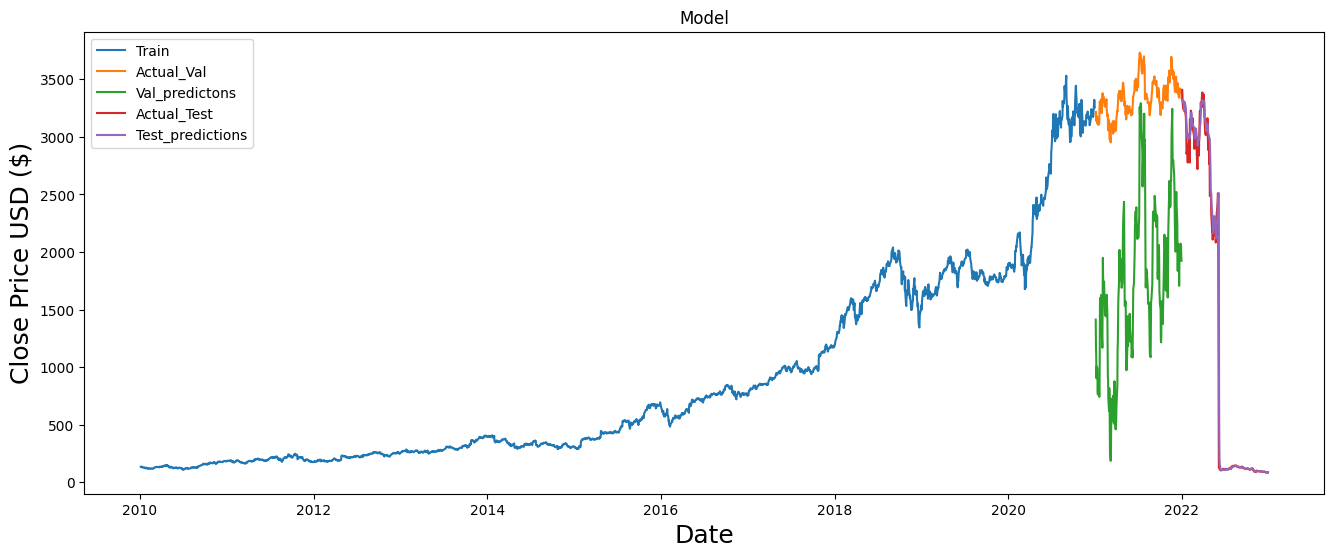

In [60]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['close','val_predictions']])
plt.plot(test[['close','test_predictions']])
plt.legend(['Train', 'Actual_Val','Val_predictons', 'Actual_Test', 'Test_predictions'], loc='upper left')
plt.show()